# Correlation

Correlation and covariance are two important concepts in statistics. They are used to measure the relationship between two variables.

- **Covariance** values range: $(-\infty, +\infty)$
- **Correlation** values range: $[-1, 1]$

Important:

- *Covariance* and *Correlation* only account for linear relationships.
- In other words, if we have a relationship that is non-linear, such measures might still turn out to be zero.

##### Setup

In [ ]:
import seaborn as sns # plotting statistical graphs
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # numpy (numerical)
import matplotlib.pyplot as plt # low level visualization
import scipy.stats as st # statistical tools

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Covariance

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, **covariance** provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} \in (-\infty, +\infty)$$

<Axes: xlabel='sepal_length', ylabel='petal_length'>

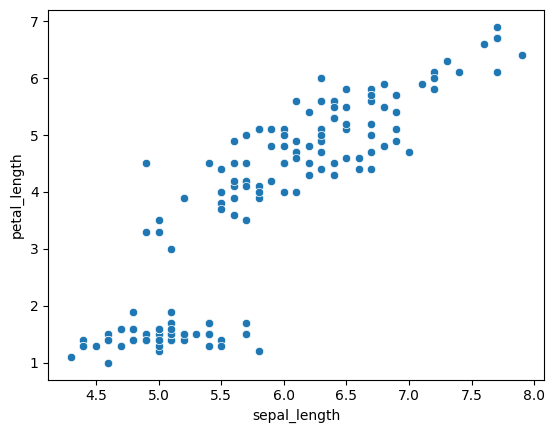

In [3]:
sns.scatterplot(x=iris['sepal_length'], y=iris['petal_length'])

In [23]:
x=iris['sepal_length']
y=iris['petal_length']
covariance = np.cov(x, y)
covariance

array([[0.68569351, 1.27431544],
       [1.27431544, 3.11627785]])

#### Pearson's Correlation Coefficient

- A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness.

- **Correlation** is the covariance normalized by the product of the standard deviations. Hence, its range is between: $-1$ to $1$.

The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ and is defined by: 
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} \in [-1, 1]$$

Recall the *Standard Deviation* of $x$, ($\sigma_x$), is square root of the *Variance* (the average squared distance between each point and the mean $\bar x$):

$$ \sigma_x = \sqrt{\frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n}} $$

Likewise, for $y$:


$$ \sigma_y = \sqrt{\frac{\sum_{i=1}^n (y_i-\bar{y})^2}{n}} $$

#### High Correlation

In [5]:
from scipy import stats

alpha = 0.05  # <-- significance level

coeff, p_value = stats.pearsonr(iris['sepal_length'], iris['petal_length'])  # <-- Pearson Correlation Coefficient

print(f"correlation coefficient: {coeff:.4f}")
print(f"p_value: {p_value}")

if p_value <= alpha:
    print("correlation is significant between sepal_length and petal_length")
else:
    print(
        "no sufficient evidence to show significant correlation between sepal_length and petal_length"
    )

correlation coefficient: 0.8718
p_value: 1.0386674194497525e-47
correlation is significant between sepal_length and petal_length


<Axes: xlabel='sepal_length', ylabel='petal_length'>

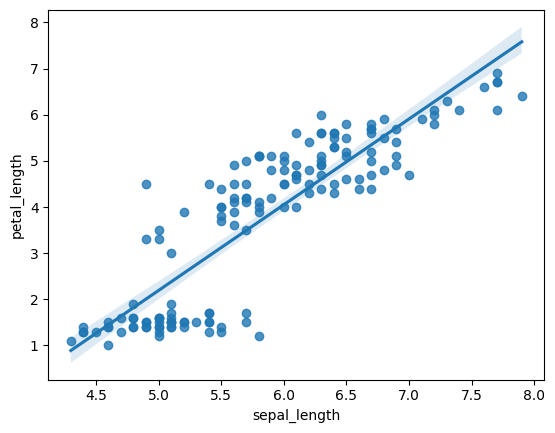

In [6]:
sns.regplot(data=iris, x="sepal_length", y="petal_length")

#### Low Correlation

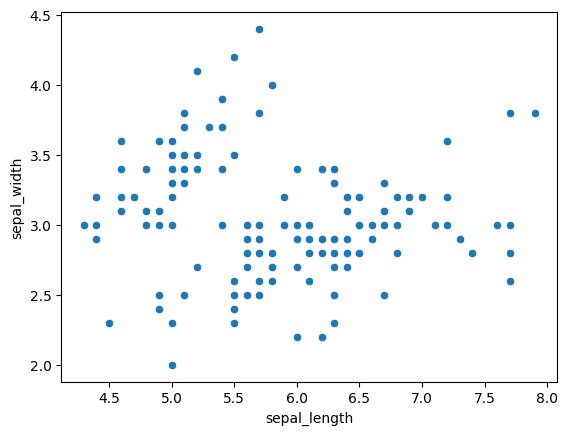

In [7]:
_ = sns.scatterplot(x=iris['sepal_length'], y=iris['sepal_width'])

In [8]:
from scipy import stats

alpha = 0.05  # <-- significance level

coeff, p_value = stats.pearsonr(iris['sepal_length'], iris['sepal_width'])

print(f"correlation coefficient: {coeff:.4f}")
print(f"p_value: {p_value:.4f}")

if p_value <= alpha:
    print("correlation is significant between sepal_length and sepal_width")
else:
    print(
        "no sufficient evidence to show significant correlation between sepal_length and sepal_width"
    )

correlation coefficient: -0.1176
p_value: 0.1519
no sufficient evidence to show significant correlation between sepal_length and sepal_width


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

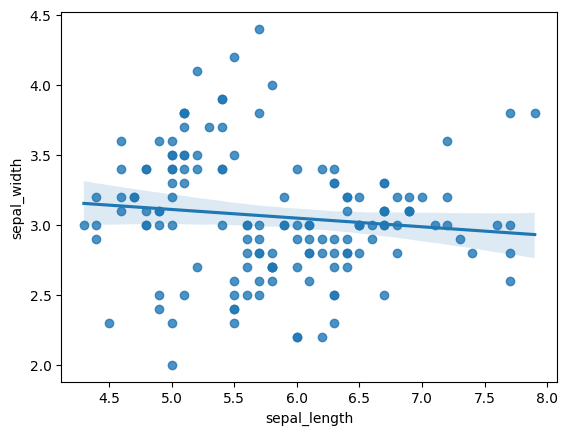

In [9]:
sns.regplot(data=iris, x="sepal_length", y="sepal_width")

### High Correlation (negative)

Let's look at the Drug Dosage example:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(
    {
        "Drug Dosage": [0, 1, 2, 3, 4, 5, 6, 7.0],
        "Forgetfullness": [1.86, 1.31, 0.62, 0.33, 0.09, -0.67, -1.23, -1.37],
    }
)

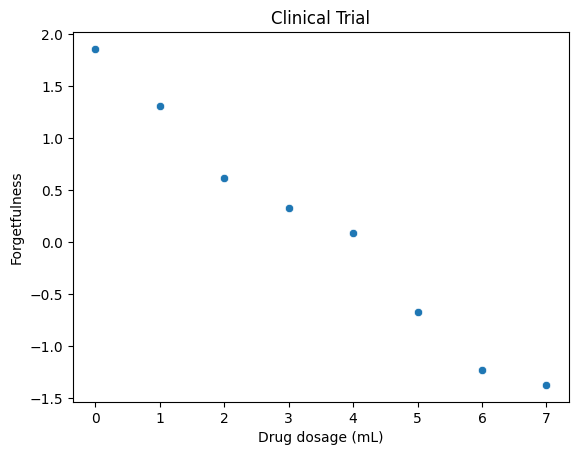

In [11]:
sns.scatterplot(x=df["Drug Dosage"], y=df["Forgetfullness"])
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
_ = plt.ylabel("Forgetfulness")

In [12]:
from scipy import stats

alpha = 0.05  # <-- significance level

coeff, p_value = stats.pearsonr(df["Drug Dosage"], df["Forgetfullness"])

print(f"correlation coefficient: {coeff:.4f}")
print(f"p_value: {p_value:.4f}")

if p_value <= alpha:
    print("correlation is significant between Drug Dosage and Forgetfullness")
else:
    print(
        "no sufficient evidence to show significant correlation between Drug Dosage and Forgetfullness"
    )

correlation coefficient: -0.9917
p_value: 0.0000
correlation is significant between Drug Dosage and Forgetfullness


<Axes: xlabel='Drug Dosage', ylabel='Forgetfullness'>

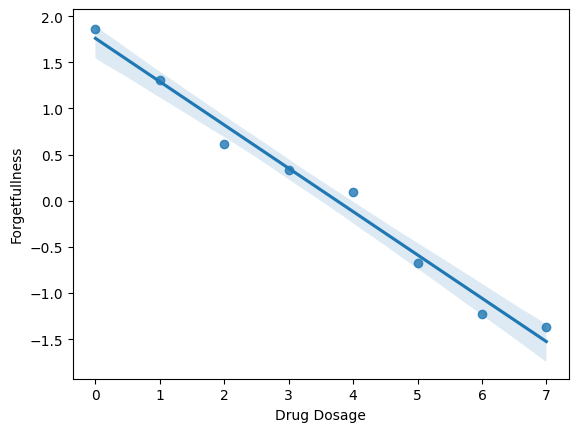

In [13]:
sns.regplot(data=df, x="Drug Dosage", y="Forgetfullness")

# Chi-Squared ($\chi^2$) Test

The chi-squared test is used to test for **relationship between two categorical variables**. Example:

- Relationship between gender and political party affiliation
- Relationship between education level and income

To perform a chi-squared test, you first need to calculate the expected frequencies for each category. The expected frequencies are calculated based on the assumption of independence between the two variables.

In [24]:
import seaborn as sns
import pandas as pd
import scipy.stats

# Load the tips dataset from Seaborn
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
tips['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [30]:
# Create a contingency table of the smoker and time variables
contingency_table = pd.crosstab(
    columns=tips["smoker"],
    index=tips["time"],
    values=tips["tip"],
    aggfunc="count"
)
contingency_table

smoker,Yes,No
time,,
Lunch,23,45
Dinner,70,106


In [18]:
# Create a contingency table of the smoker and time variables
contingency_table = pd.crosstab(
    index=tips["smoker"],
    columns=tips["time"],
    values=tips["smoker"],
    aggfunc="count",
)
contingency_table

time,Lunch,Dinner
smoker,,
Yes,23,70
No,45,106


In [40]:
contingency_table.sum().sum()

244

<Axes: xlabel='time', ylabel='smoker'>

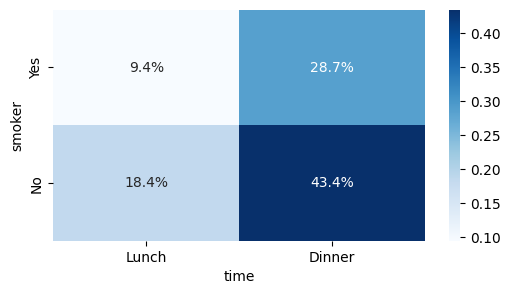

In [19]:
plt.figure(figsize=(6, 3))
normalized_table = contingency_table / contingency_table.sum().sum()
sns.heatmap(data=normalized_table, annot=True, cmap="Blues", fmt=".1%")

In [20]:
# Perform the chi-squared test
_, p_value, _, _ = st.chi2_contingency(contingency_table)

print("p-value:", p_value)
# If the p-value is less than the significance level (usually 0.05), then reject the null hypothesis
if p_value < 0.05:
    print(
        "There is a statistically significant association between smoking and time of day."
    )
else:
    print(
        "There is not enough evidence to conclude that there is a statistically significant association between smoking and time of day."
    )

p-value: 0.4771485672079724
There is not enough evidence to conclude that there is a statistically significant association between smoking and time of day.


### Expected vs Observed Frequencies

In [21]:
# Observed vs expected time a student spends on homework
observed_data = [4, 6, 8, 6, 8, 4]
expected_data = [4, 4, 10, 4, 8, 6]

stats.chisquare(f_obs=observed_data, f_exp=expected_data)

result = stats.chisquare(f_obs=observed_data, f_exp=expected_data)
p_value = result.pvalue

print("p-value:", p_value)

if p_value < 0.05:
    print("There is a statistically significant association between observed and expected data.")
else:
    print("There is not enough evidence to conclude that there is a statistically significant association between observed and expected data.")


p-value: 0.689708402146921
There is not enough evidence to conclude that there is a statistically significant association between observed and expected data.


# Correlation Doesn't Imply Causation

Source for example images: https://www.tylervigen.com/spurious-correlations

#### Example:

<img src="https://www.tylervigen.com/spurious/correlation/image/5904_cheddar-cheese-consumption_correlates-with_solar-power-generated-in-haiti.svg">

#### Example:

<img src="https://www.tylervigen.com/spurious/correlation/image/1070_google-searches-for-zombies_correlates-with_the-number-of-real-estate-agents-in-north-dakota.svg">


#### Example:

<img src="https://www.tylervigen.com/spurious/correlation/image/1689_bachelors-degrees-awarded-in-liberal-arts_correlates-with_the-number-of-pediatricians-in-massachusetts.svg">


#### In brief, three criteria are required for inferring causal relationships: 

To prove something causes something else (like medicine curing a disease), we need to show 3 things:

1. **Cause comes first:** The change in "the cause" (like taking medicine) must happen before the change in "the effect" (getting better).
2. **They're linked:** There must be a connection between "the cause" and "the effect." The stronger the connection, the more likely they're truly linked.
3. **No other culprits:** We need to be sure nothing else is making "the effect" happen (like getting plenty of rest).

**The best way to show all this is with a special kind of experiment:**

* We randomly split people into groups, like giving some medicine and others a fake pill.
* We don't know who gets what (double-blind).
* We track who gets better.

This helps us rule out other factors and see if "the cause" truly leads to "the effect."

Remember, even strong correlations (cause and effect seeming linked) don't always mean one causes the other! We need these 3 criteria to be sure.

**More examples:**


#### Example: Number of Firetrucks and Fire Damage:

Studies have found that cities with more firetrucks tend to have higher levels of fire damage. But this doesn't mean that sending more firetrucks to a scene causes more damage.

It's more likely that cities with greater fire risks, due to factors like older buildings or dense populations, have both a greater need for firetrucks and a higher likelihood of experiencing significant fire damage.



#### Example: Shoe Size and Reading Ability:

Research has shown a correlation between children's shoe size and their reading ability. However, this doesn't mean that larger feet make kids better readers.

The correlation is likely explained by age: older children tend to have both larger feet and more advanced reading skills. Age is the underlying factor driving both variables, not a direct causal relationship between shoe size and reading ability.
